# Part I
> Numerical Solution for two half cylinders in a flow

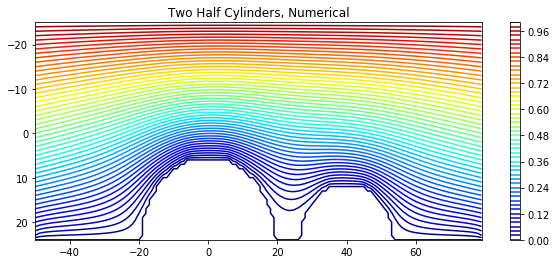

In [7]:
plt.figure(figsize=(10,4))
plt.contour(X1, Y1, T,50, cmap = colourMap)
plt.gca().invert_yaxis()
plt.title('Two Half Cylinders, Numerical')
plt.colorbar()

# Part II

Text(0.5, 1.0, 'Two Doublets')

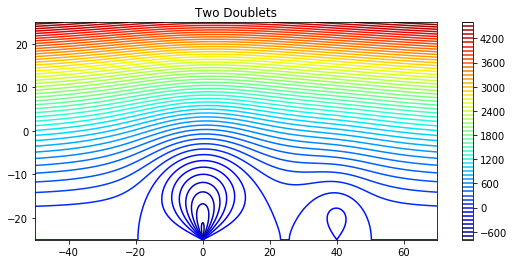

In [28]:
plt.figure(figsize=(9,4))
plt.contour(x,y, flow*(psi_one + psi_two),60, cmap = colourMap)
plt.colorbar()
plt.title('Two Doublets')

# Analysis

Doublet solution warps slightly where the two cylinders approach each other. On the left side, the fluid does not seem to stick to the cylinders as much.

The numerical solution at the edges of the cylinder there are portions of the streamline where the streamlines follow the shape of the rough "step" cylinder. 

To make the numerical solution more like the analytical, one would need to expand the size of the grid to take smaller steps in order to recreate the cylinder.

# Code and Work
> Part II was done first

# Part II

> Doublet Solution

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Create Grid
x = np.arange(-50,70,.1)
y = np.arange(-25,25,.1)
X,Y = np.meshgrid(x,y)

# define polar coordinates for first half cylinder
r_one = np.sqrt((X)**2 + (Y+25)**2)
theta_one = abs(np.arctan((Y+25)/X))
R = 27

# stream function  for first half cylinder
psi_one = (r_one - R**2 /r_one)*np.sin(theta_one)

# polar coordinates for the second half cylinder
r_two = np.sqrt((X-40)**2 + (Y+25)**2)
theta_two = abs(np.arctan((Y+25)/(X-40)))
R2 = 13.5

# Stream function for second half cylinder
psi_two = (r_two - R2**2/ r_two)*np.sin(theta_two)

# vector field going from left to right
flow = abs(r_one*np.sin(theta_one))

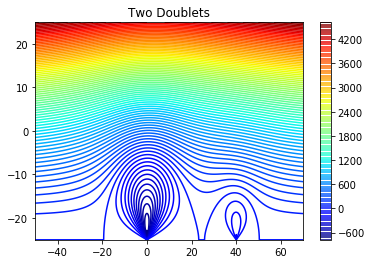

In [22]:
colourMap = plt.cm.jet
plt.contour(x,y, flow*(psi_one + psi_two),100, cmap = colourMap)
plt.title('Two Doublets')
plt.colorbar()

# Part I 

> Numerically create the system of two half cylinders in a flow

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, threshold=10, edgeitems=10, linewidth=np.inf)
np.set_printoptions(suppress=True)

# set meshgrid
x1 = np.arange(-50,80,1)
y1 = np.arange(-25,25,1)
X1,Y1 = np.meshgrid(x1,y1)




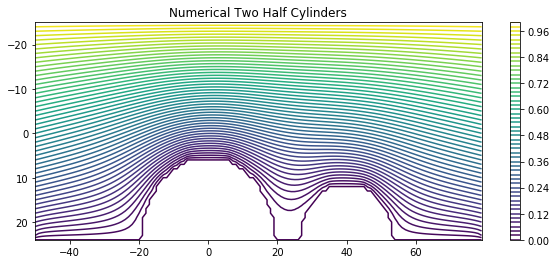

In [5]:
# set some basic constants

lenX = 130
lenY = 50 
delta = 1

# Boundary condition
Tbottom = 0
Ttop = 1
Tguess = 0


# Set array size and set the interior value to inital guess = 0
############inital guess should be 0####################
T = np.zeros((lenY, lenX))
############set the tob and bottom boundary###############
T[0,:]=Ttop 
T[lenY-1,:]=Tbottom
# loops through laplace equation

for iteration in range(0, 1000):
    for i in range(1, lenY-1, delta):
        #############upstream and downstream the flow is evenly spread##############
        T[i,0] = (50-i)/50
        T[i,lenX-1] = (50-i)/50
        for j in range(1, lenX-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
            #########using equation of a circle we can tell wether a point lies in the semi circle##############
            #########set any value in the circle to 0#####################
            if (i-50)**2+(j-50)**2<20**2:
                T[i,j]=0
            if (i-50)**2+(j-90)**2<14**2:
                T[i,j]=0

colourMap = plt.cm.jet

# Configure the contour
plt.figure(figsize=(10,4))
plt.title("Numerical Two Half Cylinders")
plt.contour(X1, Y1, T,50) 



plt.colorbar()
# Reverses on y.axis
plt.gca().invert_yaxis()